# Analyze neighbors structure

If you allow uppasd output the `struct.SIMID.out` file, you can use **UppASD tools** to analyze the structre of atomic pairs used for calculating exchange interaction.

`struct.SIMID.out` contains (usually very large) list of all atomic pairs, their relative positions, distances and their exchage energy. 

For more detail follow the [UppASD manual](https://uppasd.github.io/UppASD-manual/output/#simulation-and-hamiltonian-output).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from uppasd_tools import UppOut

## BCC Iron

We start with the [bcc Fe example](data/bccFe/).

In [2]:
# Path to the folder with UPPASD output files
path_bccFe = Path('../data/bccFe/')

# Create UppOut object
uppout_bccFe = UppOut(path_bccFe)

# Print summary of the simulation output
print(uppout_bccFe.summary())

Output directory: ../data/bccFe
Simulation ID: bcc_Fe_T
Available output files: ['averages', 'coord', 'cumulants', 'mcinitial', 'restart', 'stdenergy', 'struct', 'totenergy']
---
Number of atoms in the unit cell: 2
Number of atom types: 1
Total number of atoms in the supercell: 432
Number of ensembles in the simulation: 5
xrange: (0.0, 5.5)
yrange: (0.0, 5.5)
zrange: (0.0, 5.5)


We can see, that `struct.simid.out` file is available.

In [3]:
df_struct = uppout_bccFe.read_struct()
print(f"Number of rows: {len(df_struct)}")
df_struct.head()

Number of rows: 21600


,at1_num,at2_num,at1_type,at2_type,rx,ry,rz,Jexch,dist
0,1,2,1,1,0.5,0.5,0.5,1.337675,0.866025
1,1,362,1,1,0.5,0.5,-0.5,1.337675,0.866025
2,1,62,1,1,0.5,-0.5,0.5,1.337675,0.866025
3,1,422,1,1,0.5,-0.5,-0.5,1.337675,0.866025
4,1,12,1,1,-0.5,0.5,0.5,1.337675,0.866025


Let us now analyze the neighbors of specific atoms. 

In [4]:
from uppasd_tools.structure import get_neighbors, analyze_neighbors

First, we can list all neightbors of given atom.

In [5]:
at_num = 1  # Atomic number in the supercell to analyze neighbors for

neighbors = get_neighbors(uppout_bccFe, at_num=at_num)
print(f"Number of neighboring atoms found: {len(neighbors)}")
print("---")

# Print neighboring atoms information
for neigh_id, data in neighbors.items():
    print(f"Neighboring atom id: {neigh_id}")
    print("atom type: {}, relative position: {}, Jexch = {}".format(data["atom_type"], data["position"], data["Jexch"]))
    print("---")

Number of neighboring atoms found: 50
---
Neighboring atom id: 2
atom type: 1, relative position: [0.5 0.5 0.5], Jexch = 1.337675
---
Neighboring atom id: 362
atom type: 1, relative position: [ 0.5  0.5 -0.5], Jexch = 1.337675
---
Neighboring atom id: 62
atom type: 1, relative position: [ 0.5 -0.5  0.5], Jexch = 1.337675
---
Neighboring atom id: 422
atom type: 1, relative position: [ 0.5 -0.5 -0.5], Jexch = 1.337675
---
Neighboring atom id: 12
atom type: 1, relative position: [-0.5  0.5  0.5], Jexch = 1.337675
---
Neighboring atom id: 372
atom type: 1, relative position: [-0.5  0.5 -0.5], Jexch = 1.337675
---
Neighboring atom id: 72
atom type: 1, relative position: [-0.5 -0.5  0.5], Jexch = 1.337675
---
Neighboring atom id: 432
atom type: 1, relative position: [-0.5 -0.5 -0.5], Jexch = 1.337675
---
Neighboring atom id: 3
atom type: 1, relative position: [1. 0. 0.], Jexch = 0.7570358
---
Neighboring atom id: 11
atom type: 1, relative position: [-1.  0.  0.], Jexch = 0.7570358
---
Neighb

Function `analyze_neighbors` returns summary information for each atom type in a form of dictionary.

In [6]:
at_num = 1  # Atomic number in the supercell to analyze neighbors for

# Summarize neighbors
neigh_summary = analyze_neighbors(uppout_bccFe, at_num=at_num)

for neigh_type, data in neigh_summary.items():
    print(f"Neighbor type: {neigh_type}")
    print("---")
    print(f"Distances: {data['distance']}")   # List of relative distances
    print(f"Count: {data['count']}")          # Number of neighbors of this type in given shell (distance)
    print(f"Jexch values: {data['Jexch']}")   # Exchange interaction values
    print("---")

Neighbor type: 1
---
Distances: [0.8660254 1.        1.414214  1.658312 ]
Count: [ 8  6 12 24]
Jexch values: [ 1.337675    0.7570358  -0.05975438 -0.08819834]
---


We can plot the interactions eg. using seaborn.

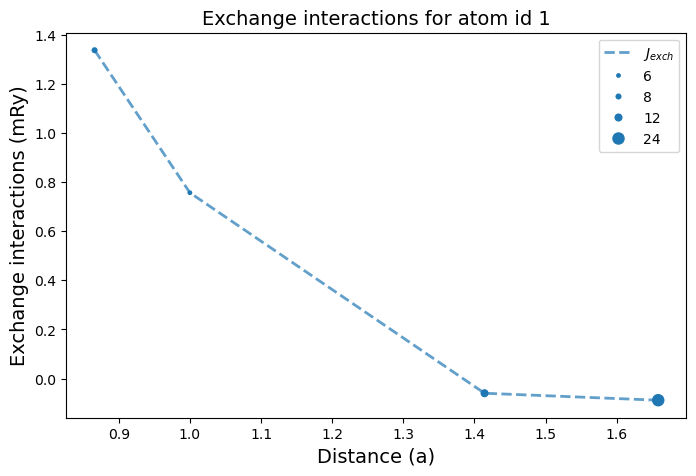

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

lineplotstyle = {
    "ls": "dashed", "lw": 2, "alpha": 0.7,
}

scatterplotstyle = {
    "marker": "o", "sizes": (20, 100), "alpha": 1.0, "lw": 1,
}

sns.lineplot(x=neigh_summary[1]['distance'], y=neigh_summary[1]['Jexch'], **lineplotstyle, label="$J_{exch}$", ax=ax)
sns.scatterplot(x=neigh_summary[1]['distance'], y=neigh_summary[1]['Jexch'], size=neigh_summary[1]['count'], **scatterplotstyle, ax=ax)

ax.set_xlabel("Distance (a)", fontsize=14)
ax.set_ylabel("Exchange interactions (mRy)", fontsize=14)
ax.set_title("Exchange interactions for atom id 1", fontsize=14)

plt.show()

## FeCo

Second, we focus on [FeCo binary alloy](data/FeCo) example, which has more complex structure with two different atom types.

In [8]:
# Path to the folder with UPPASD output files
path_FeCo = Path('../data/FeCo/')

# Create UppOut object
uppout_FeCo = UppOut(path_FeCo)

# Print summary of the simulation output
print(uppout_FeCo.summary())

Output directory: ../data/FeCo
Simulation ID: FeCo__B2
Available output files: ['averages', 'coord', 'cumulants', 'mcinitial', 'projavgs', 'projcumulants', 'restart', 'struct', 'totenergy']
---
Number of atoms in the unit cell: 2
Number of atom types: 2
Total number of atoms in the supercell: 432
Number of ensembles in the simulation: 1
xrange: (0.0, 5.5)
yrange: (0.0, 5.5)
zrange: (0.0, 5.5)


In [9]:
df_struct = uppout_FeCo.read_struct()
print(f"Number of rows: {len(df_struct)}")
df_struct.head()

Number of rows: 110160


,at1_num,at2_num,at1_type,at2_type,rx,ry,rz,Jexch,dist
0,1,432,1,2,-0.5,-0.5,-0.5,1.839624,0.866025
1,1,422,1,2,0.5,-0.5,-0.5,1.839624,0.866025
2,1,372,1,2,-0.5,0.5,-0.5,1.839624,0.866025
3,1,362,1,2,0.5,0.5,-0.5,1.839624,0.866025
4,1,72,1,2,-0.5,-0.5,0.5,1.839624,0.866025


We can see that the number of neighbors is realively high. Therefore, we directly use `analyze_neighbors` function.

In [10]:
# Summarize neighbors of atom 1
neigh_at1 = analyze_neighbors(uppout_FeCo, at_num=1, group_by="both")

for neigh_type, data in neigh_at1.items():
    print(f"Neighbor type: {neigh_type}")
    print("---")
    print(f"Distances: {data['distance']}")   # List of relative distances
    print(f"Count: {data['count']}")          # Number of neighbors of this type in given shell (distance)
    print(f"Jexch values: {data['Jexch']}")   # Exchange interaction values
    print("---")

Neighbor type: 1
---
Distances: [1.       1.       1.414214 1.414214 1.732051 2.       2.       2.
 2.236068 2.236068 2.44949  2.828427 2.828427 3.       3.      ]
Count: [ 2  4  8  4  8  2  2  2 12 12 24  4  8 24  3]
Jexch values: [ 0.03181827  0.03515949  0.08012466  0.08128145 -0.2266162  -0.03193378
 -0.03148918 -0.03029254  0.04234447  0.04266384 -0.05908638 -0.02461863
 -0.02423667 -0.00764574  0.01711845]
---
Neighbor type: 2
---
Distances: [0.8660254 1.658312  2.179449  2.179449  2.598076  2.598076  2.95804
 2.95804  ]
Count: [ 8 24 16  8 24  8  8 40]
Jexch values: [ 1.839624    0.11072093 -0.00554106 -0.00545508 -0.01076728  0.03232751
  0.0024906   0.00258673]
---


In [11]:
# Summarize neighbors of atom 1
neigh_at2 = analyze_neighbors(uppout_FeCo, at_num=2, group_by="both")

for neigh_type, data in neigh_at2.items():
    print(f"Neighbor type: {neigh_type}")
    print("---")
    print(f"Distances: {data['distance']}")   # List of relative distances
    print(f"Count: {data['count']}")          # Number of neighbors of this type in given shell (distance)
    print(f"Jexch values: {data['Jexch']}")   # Exchange interaction values
    print("---")

Neighbor type: 1
---
Distances: [0.8660254 1.658312  2.179449  2.179449  2.598076  2.598076  2.95804
 2.95804  ]
Count: [ 8 24 16  8 24  8  8 40]
Jexch values: [ 1.839624    0.11072093 -0.00554106 -0.00545508 -0.01076728  0.03232751
  0.0024906   0.00258673]
---
Neighbor type: 2
---
Distances: [1.       1.       1.414214 1.732051 2.       2.236068 2.44949  2.828427
 3.       3.      ]
Count: [ 2  4 12  8  6 24 24 12 24  3]
Jexch values: [ 0.05996639  0.06080649  0.0359151  -0.04590622  0.04190403  0.00219184
 -0.00424167 -0.00040842 -0.00123491  0.01588026]
---


Finally, we can plot the interactions between atoms of different types.

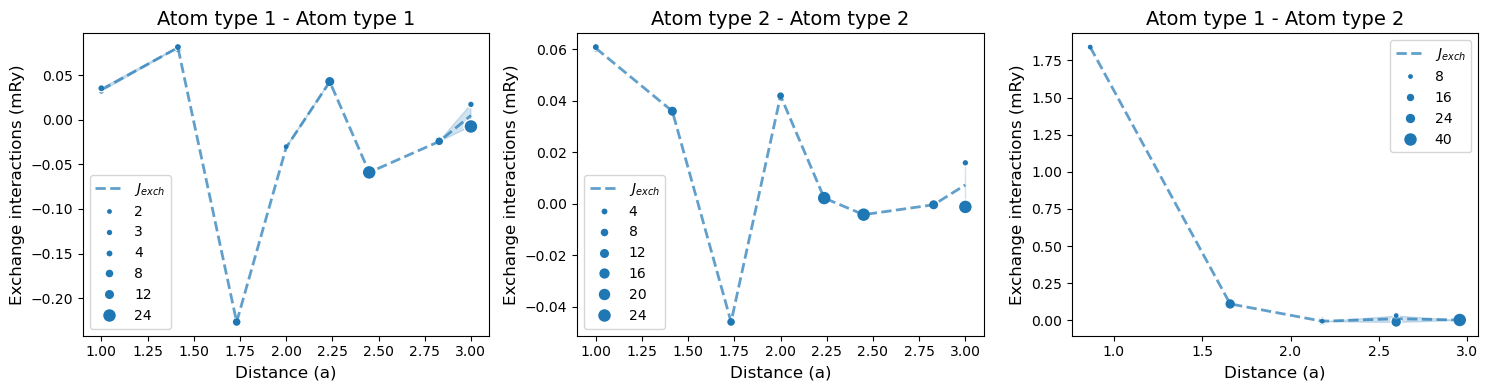

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

lineplotstyle = {
    "ls": "dashed", "lw": 2, "alpha": 0.7,
}

scatterplotstyle = {
    "marker": "o", "sizes": (20, 100), "alpha": 1.0, "lw": 1,
}

# Interations between atom types 1 and 1
sns.lineplot(x=neigh_at1[1]['distance'], y=neigh_at1[1]['Jexch'], **lineplotstyle, label="$J_{exch}$", ax=axs[0])
sns.scatterplot(x=neigh_at1[1]['distance'], y=neigh_at1[1]['Jexch'], size=neigh_at1[1]['count'], **scatterplotstyle, ax=axs[0])
axs[0].set_title("Atom type 1 - Atom type 1", size=14)

# Interations between atom types 2 and 2
sns.lineplot(x=neigh_at2[2]['distance'], y=neigh_at2[2]['Jexch'], **lineplotstyle, label="$J_{exch}$", ax=axs[1])
sns.scatterplot(x=neigh_at2[2]['distance'], y=neigh_at2[2]['Jexch'], size=neigh_at2[2]['count'], **scatterplotstyle, ax=axs[1])
axs[1].set_title("Atom type 2 - Atom type 2", size=14)   

# Interations between atom types 1 and 2
sns.lineplot(x=neigh_at1[2]['distance'], y=neigh_at1[2]['Jexch'], **lineplotstyle, label="$J_{exch}$", ax=axs[2])
sns.scatterplot(x=neigh_at1[2]['distance'], y=neigh_at1[2]['Jexch'], size=neigh_at1[2]['count'], **scatterplotstyle, ax=axs[2])
axs[2].set_title("Atom type 1 - Atom type 2", size=14)

for ax in axs:
    ax.set_xlabel("Distance (a)", fontsize=12)
    ax.set_ylabel("Exchange interactions (mRy)", fontsize=12)

plt.tight_layout()
plt.show()


In the pictures we can see some multiple values of exchange interactions at the same distance. This originates from the input data in `jfile`.

## Notes

- you can use `get_neighbors()` and `analyze_neighbors()` functions for any atom in the supercell.
- in case of periodic structure, atoms of the same types should have the same number of neighbors.